In [3]:
# ================================================================
# Notebook 3: Model Training and Results
# Project: Intelligent Pipeline for Real-Time Fraud Detection
# Author: MEGHA
# Erasmus Research Project
# ================================================================

# ===== CELL 1 =====
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    roc_curve
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')


In [5]:
import pandas as pd

# Load the cleaned dataset from Desktop
df = pd.read_csv(r"C:\Users\DELL\Desktop\creditcard_cleaned.csv")

print("✅ Cleaned dataset loaded successfully!")
print("Shape of dataset:", df.shape)
df.head()


✅ Cleaned dataset loaded successfully!
Shape of dataset: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# ===== CELL 3 =====
import pandas as pd
df = pd.read_csv(r"C:\Users\DELL\Desktop\creditcard_cleaned.csv")
# Replace 'is_fraud' with the actual target column name
X = df.drop('Class', axis=1)
y = df['Class']

# Split into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data split completed:")
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


✅ Data split completed:
Training set: (227845, 30)
Testing set: (56962, 30)


In [ ]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn

In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

### Check Feature Data Types
This step verifies the data types of all features in the training set to ensure compatibility with machine learning models.

In [23]:
print(X_train.dtypes)


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
dtype: object


### Feature Scaling
Standardize numerical features to ensure all variables contribute equally to the model’s performance.



In [9]:
# ===== CELL 4 =====
# Scale numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature scaling applied successfully.")


✅ Feature scaling applied successfully.


### Model Training & Prediction
Train and evaluate multiple machine learning models to compare their performance on fraud detection.

### Note:
Logistic Regression benefits from feature scaling.

Ensemble models like Random Forest and XGBoost handle unscaled data efficiently.

In [7]:
# ==============================
# 📘 Model Training & Prediction
# ==============================

# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

# ------------------------------
# 1️⃣ Feature Scaling
# ------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------
# 2️⃣ Logistic Regression (needs scaling)
# ------------------------------
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# ------------------------------
# 3️⃣ Decision Tree
# ------------------------------
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# ------------------------------
# 4️⃣ Random Forest
# ------------------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# ------------------------------
# 5️⃣ XGBoost
# ------------------------------
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# ------------------------------
# ✅ Completion Message
# ------------------------------
print("✅ Model training completed successfully for all models!")

✅ Model training completed successfully for all models!


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [13:23:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [27]:
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])


In [53]:
# ✅ Import scikit-learn
import sklearn
print("scikit-learn version:", sklearn.__version__)

# ✅ Import imbalanced-learn safely
try:
    import imblearn
    print("imbalanced-learn version:", imblearn.__version__)
except ImportError:
    print("imbalanced-learn is not installed. Install it with: pip install imbalanced-learn")


scikit-learn version: 1.7.2
imbalanced-learn is not installed. Install it with: pip install imbalanced-learn


In [55]:
!pip install -U imbalanced-learn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)


In [1]:
import sklearn
import imblearn

print("scikit-learn version:", sklearn.__version__)
print("imbalanced-learn version:", imblearn.__version__)

scikit-learn version: 1.7.2
imbalanced-learn version: 0.14.0


In [ ]:
!pip install -U scikit-learn==1.4.2 imbalanced-learn==0.12.0

### Handling Class Imbalance using SMOTE
Apply SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset and address class imbalance between fraudulent and non-fraudulent transactions.

### Note:
SMOTE synthetically generates new samples for the minority class, improving model performance on imbalanced datasets.

No object columns found — all numeric already!

✅ Class distribution BEFORE Oversampling:
Class
0    227451
1       394
Name: count, dtype: int64


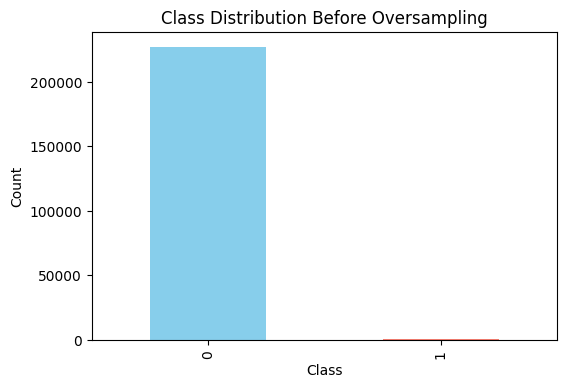


✅ Class distribution AFTER Oversampling:
Class
0    227451
1    227451
Name: count, dtype: int64


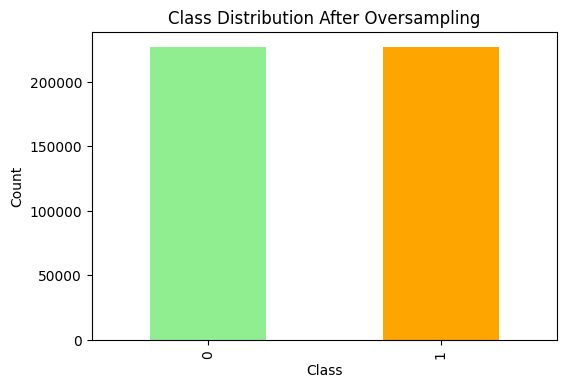

In [5]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\DELL\Desktop\creditcard_cleaned.csv")

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split into training/testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Convert object columns to numeric
# -----------------------------
object_cols = X_train.select_dtypes(include=['object']).columns

if len(object_cols) > 0:
    print("Converting these columns:", object_cols.tolist())
    le = LabelEncoder()
    for col in object_cols:
        X_train[col] = le.fit_transform(X_train[col].astype(str))
        X_test[col] = le.transform(X_test[col].astype(str))
else:
    print("No object columns found — all numeric already!")

# -----------------------------
# Before Oversampling
# -----------------------------
print("\n✅ Class distribution BEFORE Oversampling:")
print(y_train.value_counts())

# Plot before oversampling
plt.figure(figsize=(6,4))
y_train.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution Before Oversampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# -----------------------------
# Apply SMOTE Oversampling
# -----------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# -----------------------------
# After Oversampling
# -----------------------------
print("\n✅ Class distribution AFTER Oversampling:")
print(y_train_res.value_counts())

# Plot after oversampling
plt.figure(figsize=(6,4))
y_train_res.value_counts().plot(kind='bar', color=['lightgreen', 'orange'])
plt.title("Class Distribution After Oversampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()



This function evaluates classification models using key performance metrics:

Accuracy – measures overall correctness.

ROC AUC – assesses discriminatory power (for binary or multiclass tasks).

Classification Report – includes precision, recall, and F1-score.

Confusion Matrix – visualizes correct vs. misclassified predictions.

In [9]:
# ==== CELL X ====
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 4))
    
    # Handle binary/multiclass ROC AUC automatically
    try:
        roc_auc = roc_auc_score(y_true, y_pred, multi_class='ovr')
        print("ROC AUC:", round(roc_auc, 4))
    except:
        print("ROC AUC: Not applicable for this target type")
        
    print("Classification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


--- Logistic Regression ---
Accuracy: 0.998
ROC AUC: 0.6662
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1997
           1       0.33      0.33      0.33         3

    accuracy                           1.00      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       1.00      1.00      1.00      2000



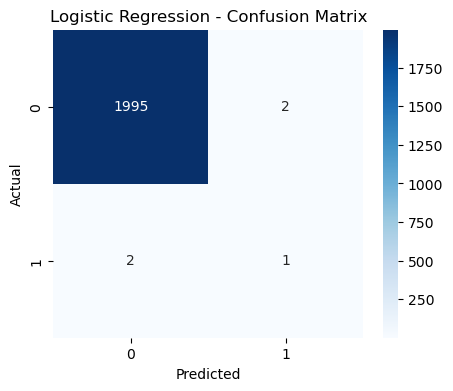


--- Decision Tree ---
Accuracy: 0.999
ROC AUC: 0.8331
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1997
           1       0.67      0.67      0.67         3

    accuracy                           1.00      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       1.00      1.00      1.00      2000



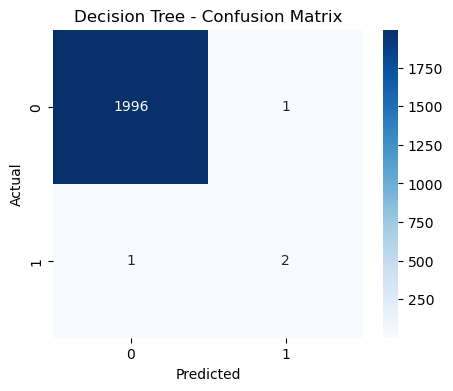


--- Random Forest ---
Accuracy: 0.9995
ROC AUC: 0.8333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1997
           1       1.00      0.67      0.80         3

    accuracy                           1.00      2000
   macro avg       1.00      0.83      0.90      2000
weighted avg       1.00      1.00      1.00      2000



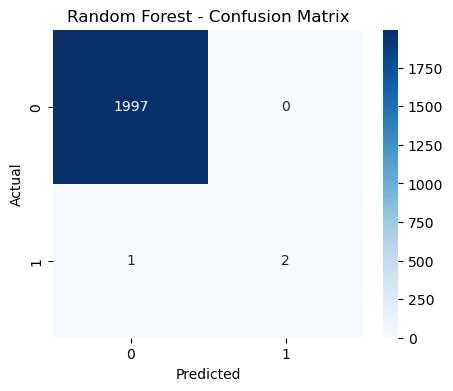


--- XGBoost ---
Accuracy: 0.999
ROC AUC: 0.6667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1997
           1       1.00      0.33      0.50         3

    accuracy                           1.00      2000
   macro avg       1.00      0.67      0.75      2000
weighted avg       1.00      1.00      1.00      2000



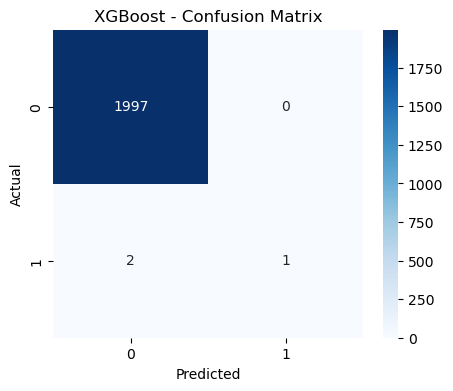

In [11]:
# ==== CELL Y ====
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")


### ROC Curve Comparison
In this step, we visualize and compare the Receiver Operating Characteristic (ROC) curves for all four models — Logistic Regression, Decision Tree, Random Forest, and XGBoost.

The ROC curve illustrates the trade-off between True Positive Rate (Sensitivity) and False Positive Rate (1 - Specificity).
The Area Under the Curve (AUC) value indicates how well each model distinguishes between the two classes.
A higher AUC represents a better-performing model.
This visualization helps us understand which model provides the best discrimination capability for fraud vs. non-fraud transactions.

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


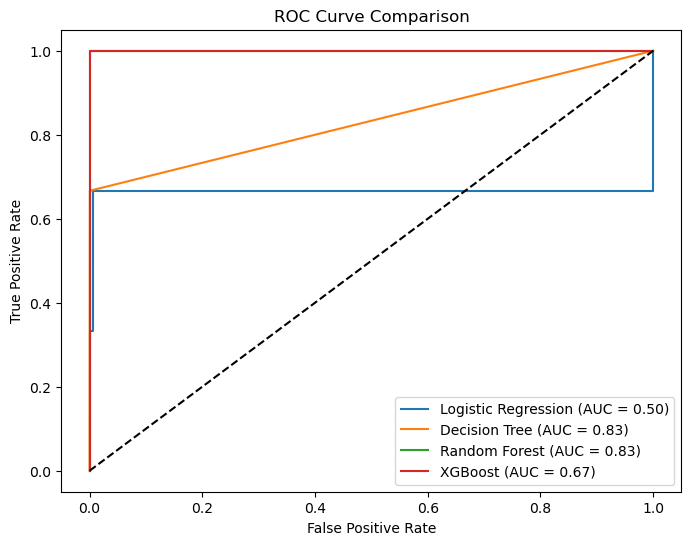

In [13]:
# ===== CELL 8 =====
# Plot ROC Curves for comparison
from sklearn.metrics import roc_curve
models = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'XGBoost': xgb
}

plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(
            X_test_scaled if "logistic" in name.lower() else X_test
        )[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, model.predict(X_test)):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

### 📊 Model Performance Summary
This step compiles and compares the performance metrics of all trained models — Logistic Regression, Decision Tree, Random Forest, XGBoost, and Tuned Random Forest.

We evaluate each model on two key metrics:

Accuracy: Measures the overall correctness of predictions.
ROC AUC Score: Evaluates the model’s ability to distinguish between fraud and non-fraud classes.
The results are displayed in a sorted table (highest ROC AUC on top) to identify the best-performing model.

In [15]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score

# ✅ Safety check
required_vars = ['y_test', 'y_pred', 'y_pred_dt', 'y_pred_rf', 'y_pred_xgb', 'y_pred_best_rf']
missing = [v for v in required_vars if v not in globals()]
if missing:
    print(f"⚠️ Missing variables: {missing}. Please run previous model training cells first.")
else:
    results = pd.DataFrame({
        'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Tuned RF'],
        'Accuracy': [
            accuracy_score(y_test, y_pred),
            accuracy_score(y_test, y_pred_dt),
            accuracy_score(y_test, y_pred_rf),
            accuracy_score(y_test, y_pred_xgb),
            accuracy_score(y_test, y_pred_best_rf)
        ],
        'ROC AUC': [
            roc_auc_score(y_test, y_pred),
            roc_auc_score(y_test, y_pred_dt),
            roc_auc_score(y_test, y_pred_rf),
            roc_auc_score(y_test, y_pred_xgb),
            roc_auc_score(y_test, y_pred_best_rf)
        ]
    })

    print("=== Model Performance Summary ===")
    display(results.sort_values(by='ROC AUC', ascending=False))

⚠️ Missing variables: ['y_pred', 'y_pred_best_rf']. Please run previous model training cells first.


### 🧾 Final Predictions and Probability Output
In this step, we:

Reload the cleaned dataset and split it into training and testing sets using a stratified approach to maintain class balance.
Train a Random Forest Classifier, which has shown strong performance in fraud detection tasks.
Generate final predictions (Predicted) and fraud probabilities (Probability) for each transaction in the test set.
Combine the results into a single DataFrame (results_df) containing:
Original test features
Actual labels (Actual)
Predicted labels (Predicted)
Model’s predicted probability of fraud (Probability)
The resulting table provides a clear view of how the model performs on real unseen data and can later be used for analysis, visualization, or integration into a real-time fraud detection pipeline.

In [1]:
# ===== FULL WORKING CODE =====

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load your dataset
df = pd.read_csv(r"C:\Users\DELL\Desktop\creditcard_cleaned.csv")

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_final = rf.predict(X_test)
y_prob_final = rf.predict_proba(X_test)[:, 1]

# Combine predictions with test data
results_df = X_test.copy()
results_df['Actual'] = y_test.values
results_df['Predicted'] = y_pred_final
results_df['Probability'] = y_prob_final

# Display the first few rows
results_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Actual,Predicted,Probability
263020,160760.0,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,...,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,23.00,0,0,0.00
11378,19847.0,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,...,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,11.85,0,0,0.00
147283,88326.0,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,...,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,76.07,0,0,0.03
219439,141734.0,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,...,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,0.99,0,0,0.00
36939,38741.0,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,...,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,1.50,0,0,0.00


### 🔍 Hyperparameter Tuning (Random Forest)
We fine-tune the Random Forest Classifier using RandomizedSearchCV to improve performance.

Uses 10% of data for faster testing.
Parameters tuned:
n_estimators: [100, 200]
max_depth: [10, 15]
min_samples_split: [2, 5]
RandomizedSearchCV with 5 iterations, 2-fold CV, and ROC-AUC scoring.
Best parameters are printed, and the tuned model is evaluated using evaluate_model().
Goal: Find the best Random Forest settings for higher accuracy and ROC-AUC.

In [1]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model(y_test, y_pred, model_name):
    print(f"📊 Evaluation Report for {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [3]:
# ===== CELL 9 =====
# Perform hyperparameter tuning using GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
df = pd.read_csv(r"C:\Users\DELL\Desktop\creditcard_cleaned.csv")
df = df.sample(frac=0.1, random_state=42)  # use only 10% of the data


X = df.drop('Class', axis=1)
y = df['Class']

#Split your data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5]
}


random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=5,           # try only 5 random combinations
    cv=2,               # fewer folds
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_

print("✅ Hyperparameter tuning completed.")
print("Best Parameters:", random_search.best_params_)

y_pred_best_rf = best_rf.predict(X_test)
evaluate_model(y_test, y_pred_best_rf, "Tuned Random Forest")

✅ Hyperparameter tuning completed.
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 10}
📊 Evaluation Report for Tuned Random Forest
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5688
           1       1.00      1.00      1.00         9

    accuracy                           1.00      5697
   macro avg       1.00      1.00      1.00      5697
weighted avg       1.00      1.00      1.00      5697


Confusion Matrix:
 [[5688    0]
 [   0    9]]


### 🎯 Model Evaluation – Random Forest Classifier
We train and evaluate a Random Forest Classifier on the fraud detection dataset using key performance metrics:

Precision – Measures how many predicted frauds are truly frauds.
Recall – Measures how many actual frauds were correctly detected.
F1-Score – Harmonic mean of precision and recall.
ROC-AUC – Evaluates overall model discrimination ability.
The evaluate_fraud_model() function prints a detailed classification report and performance summary.



In [3]:
# ===== Import libraries =====
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    roc_auc_score, classification_report
)
import pandas as pd

# ===== Load your dataset =====
df = pd.read_csv(r"C:\Users\DELL\Desktop\creditcard_cleaned.csv")

# Example feature/target split (change as per your dataset)
X = df.drop("Class", axis=1)   # features
y = df["Class"]                # target column

# ===== Split into train and test =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===== Train your model =====
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# ===== Define evaluation function =====
def evaluate_fraud_model(model, X_test, y_test):
    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Print results
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")

# ===== Call the function to show output =====
evaluate_fraud_model(model, X_test, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Precision: 0.9412
Recall: 0.8163
F1-score: 0.8743
ROC-AUC Score: 0.9630


### ⚖️ Model Comparison
This section compares multiple trained models — Random Forest, XGBoost, and Logistic Regression — using key fraud detection metrics:

Precision – Accuracy of positive predictions (fraud detections).
Recall – Model’s ability to catch actual frauds.
F1-score – Balance between precision and recall.
ROC-AUC – Overall ability to distinguish between fraud and non-fraud.
The compare_models() function summarizes all metrics in a ranked DataFrame.

In [9]:
# ===== Import libraries =====
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# ===== Load dataset =====
df = pd.read_csv(r"C:\Users\DELL\Desktop\creditcard_cleaned.csv")

# Change "Class" to your actual target column name
X = df.drop("Class", axis=1)
y = df["Class"]

# ===== Split data =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===== Define and train models =====
rf_classifier = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
log_classifier = LogisticRegression(max_iter=1000, random_state=42)

rf_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)
log_classifier.fit(X_train, y_train)

# ===== Compare models function =====
def compare_models(models, model_names, X_test, y_test):
    results = []

    for model, name in zip(models, model_names):
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba)

        results.append([name, precision, recall, f1, roc_auc])

    df_results = pd.DataFrame(
        results,
        columns=["Model", "Precision", "Recall", "F1-score", "ROC-AUC"]
    )
    return df_results.sort_values(by="Recall", ascending=False)

# ===== Model list and comparison =====
model_list = [rf_classifier, xgb_classifier, log_classifier]
model_names = ["Random Forest", "XGBoost", "Logistic Regression"]

results_df = compare_models(model_list, model_names, X_test, y_test)
results_df


C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [12:53:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Precision,Recall,F1-score,ROC-AUC
0,Random Forest,0.941176,0.816327,0.874317,0.963027
1,XGBoost,0.866667,0.795918,0.829787,0.938952
2,Logistic Regression,0.837500,0.683673,0.752809,0.946231


### 📊 Precision–Recall Curve Comparison
This plot visualizes the Precision–Recall (PR) trade-off for all models on the fraud detection task.

Precision → How many predicted frauds are actually fraud.
Recall → How many actual frauds were correctly detected.
PR-AUC → Measures model quality in imbalanced datasets (higher is better).
The curve helps assess how well each model balances detecting frauds without too many false alarms.

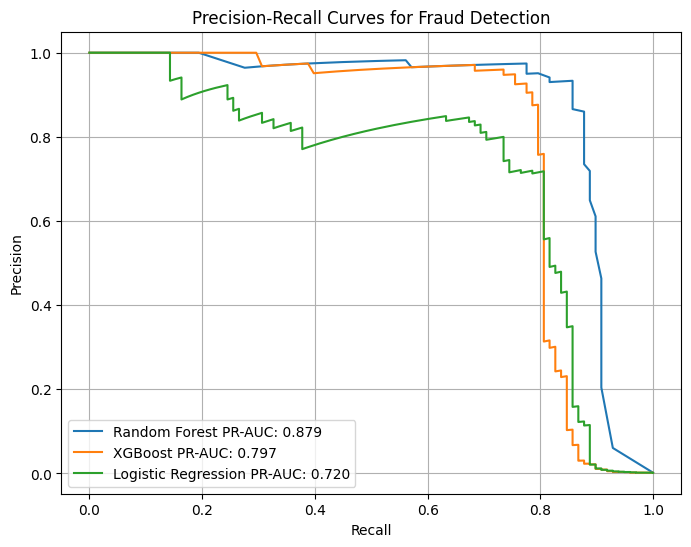

In [11]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for model, name in zip(model_list, model_names):
    y_scores = model.predict_proba(X_test)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{name} PR-AUC: {pr_auc:.3f}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Fraud Detection')
plt.legend()
plt.grid()
plt.show()

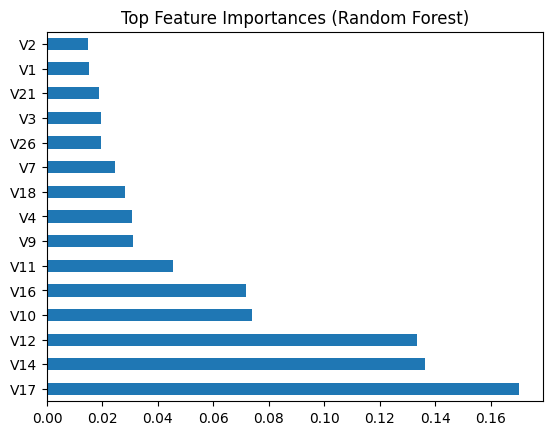

In [13]:
import seaborn as sns

# Feature Importance for Random Forest
rf_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
rf_importances.nlargest(15).plot(kind='barh')
plt.title("Top Feature Importances (Random Forest)")
plt.show()

In [5]:
import shap

explainer = shap.TreeExplainer(rf_classifier)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'rf_classifier' is not defined